In [85]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from sklearn.neural_network import MLPClassifier


## 1. Business Understanding

Harder to play, but that makes for a better gaming experience. Today, I have installed FIFA 20 and started this project as well so, lets work on understanding both.

I have taken this dataset from kaggle
Link: https://www.kaggle.com/stefanoleone992/fifa-20-complete-player-dataset


Here, I will focus on the questions below:

Q1: What's the ratio of total wages/ total potential for clubs. Which clubs are the most spends most on player potential？

Q2: What's the age distribution like? How is it related to player's overall rating?

Q3: Predict the best position


## 2. Data Understanding

In [86]:
# loading dataset
df = pd.read_csv('players_20.csv')
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [87]:
# number of players in dataset
df.shape[0]

18278

In [88]:
df.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=104)


## 3. Prepare Data

There are some necessary steps need to taken before continue exploring the dataset:

- Drop unused columns
- Handle missing values, drop them if necessary



In [89]:
player_20df = df.copy()

In [90]:
#Drop unused columns
columns_to_drop = ['sofifa_id', 'player_url', 'long_name', 'dob', 'height_cm', 'weight_kg', 'preferred_foot', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']

In [91]:
player_20df.drop(columns_to_drop, axis=1, inplace=True)

In [92]:
player_20df.head()

,short_name,age,nationality,club,overall,potential,value_eur,wage_eur,player_positions,international_reputation,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,32,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",5,...,75,96,33,37,26,6,11,15,14,8
1,Cristiano Ronaldo,34,Portugal,Juventus,93,93,58500000,405000,"ST, LW",5,...,85,95,28,32,24,7,11,15,14,11
2,Neymar Jr,27,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",5,...,90,94,27,26,29,9,9,15,15,11
3,J. Oblak,26,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,3,...,11,68,27,12,18,87,92,78,90,89
4,E. Hazard,28,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",4,...,88,91,34,27,22,11,12,6,8,8


In [93]:
player_20df.describe()

,age,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,pace,shooting,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,18278.000000,16242.000000,16242.000000,...,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,25.283291,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,2.368038,67.700899,52.298301,...,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,4.656964,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,0.765038,11.297656,14.029418,...,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,16.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,24.000000,15.000000,...,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,22.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,61.000000,42.000000,...,39.000000,51.000000,29.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,25.000000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,2.000000,69.000000,54.000000,...,49.000000,60.000000,52.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,29.000000,71.000000,75.000000,2.100000e+06,8000.000000,1.000000,3.000000,3.000000,75.000000,63.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,42.000000,94.000000,95.000000,1.055000e+08,565000.000000,5.000000,5.000000,5.000000,96.000000,93.000000,...,92.000000,96.000000,94.000000,92.000000,90.000000,90.000000,92.000000,93.000000,91.000000,92.000000


In [94]:
#missing values
player_20df.isnull().sum()

short_name                        0
age                               0
nationality                       0
club                              0
overall                           0
potential                         0
value_eur                         0
wage_eur                          0
player_positions                  0
international_reputation          0
weak_foot                         0
skill_moves                       0
work_rate                         0
pace                           2036
shooting                       2036
passing                        2036
dribbling                      2036
defending                      2036
physic                         2036
gk_diving                     16242
gk_handling                   16242
gk_kicking                    16242
gk_reflexes                   16242
gk_speed                      16242
gk_positioning                16242
player_traits                 10712
attacking_crossing                0
attacking_finishing         

## 4. Answer Questions base on dataset


In [95]:
# Q1: What's the ratio of total wages/ total potential for clubs. Which clubs are the most spends most on player potential？

club_wages = player_20df.groupby('club').sum()

In [96]:
club_player_count = player_20df.groupby('club').count()
# number of clubs
club_player_count.shape[0]

698

In [97]:
# Average number of players in each club
round(club_player_count['age'].mean(),2)

26.19

In [98]:
# ratio of total wages/ total potential for clubs
round(club_wages['wage_eur'].sum() / club_wages['potential'].sum()/1000, 2)

0.13

Text(0.5, 1.0, 'Top 10 clubs spending wage on players potential')

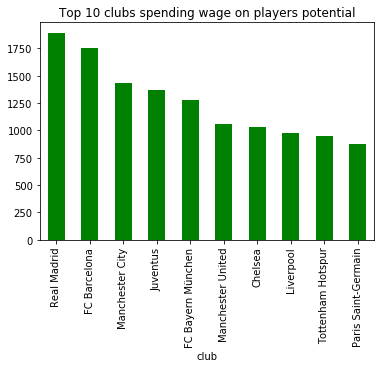

In [99]:
club_wages['wage_eur/potential'] = club_wages['wage_eur'] / club_wages['potential']
club_wages.sort_values('wage_eur/potential', ascending=False, inplace=True)
club_wages['wage_eur/potential'].head(10).plot(kind='bar', color='green')
plt.title('Top 10 clubs spending wage on players potential')

According to this Real Madrid spend most on the player potential. Including Real Madrid, FC Barcelona, Man City willing to spend much more wage for high potential players than average clubs. This is how they stay competitive in leagues.

In [100]:
# Q2: What's the age distribution like? How is it related to player's overall rating?
#age count
age_count = player_20df['age'].value_counts()
age_count.sort_index(ascending=True, inplace=True)

In [101]:
#age mean
age_mean = player_20df.groupby('age').mean()

age_count_list = age_count.values.tolist()
age_overall_rating_list = age_mean['overall'].values.tolist()

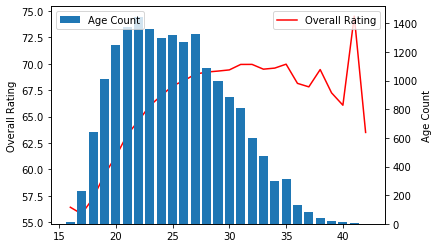

In [102]:
ages = age_count.index.values.tolist()
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(ages,age_overall_rating_list, color = 'red', label='Overall Rating')
ax1.legend(loc=1)
ax1.set_ylabel('Overall Rating')

ax2 = ax1.twinx()
plt.bar(ages, age_count_list, label='Age Count')
ax2.legend(loc=2)
ax2.set_ylabel('Age Count')
plt.show()


As given in above plot, we can see that most players are between 20-27 years old. And players' number start to decrease after 27 years old and speed up after 30. Reason behind this could be that many young player didn't get enough opportunities to prove themselves and give up their dream as a football player.

When a football player reaches their late 20s, they have gain enough experience and reaches peak of their rating. The golden era of a football player starts here and ends when his age reaches 35. At this age, his physical body condition drops quickly so as average rating.

There are also quite a few numbers of players with age over 37, 38 years old. This is quite a surprise especially their rating still can remain quite high.



## 5. Train model and Measure Performance


In [103]:
# Q3: Predict the best position

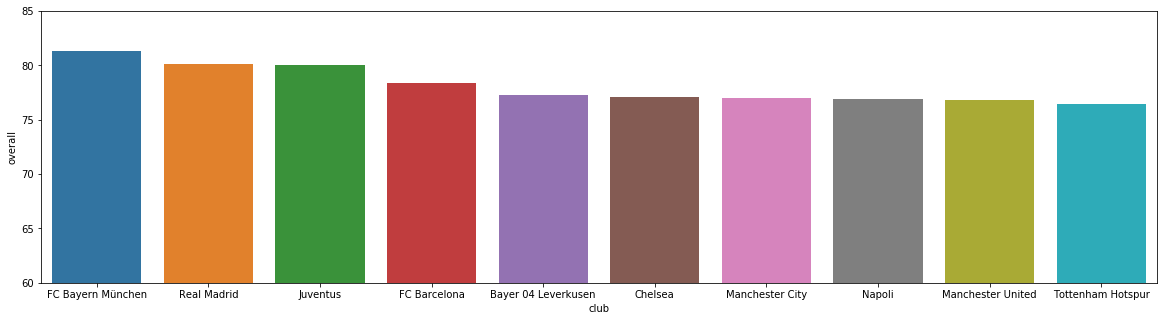

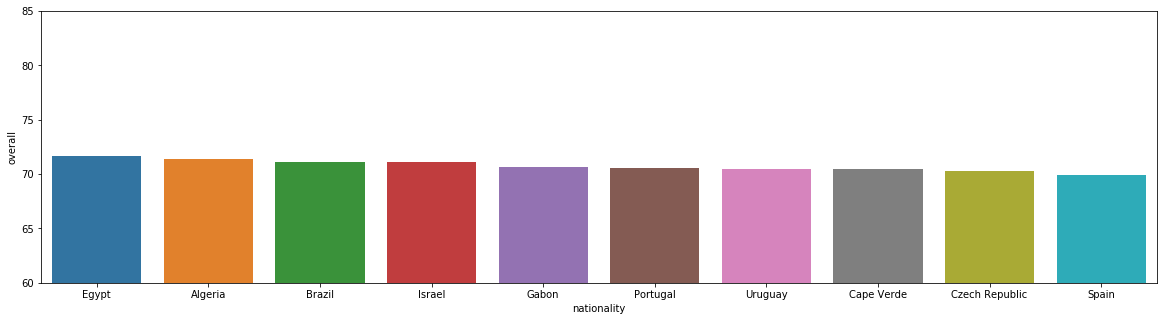

In [105]:
#Which club has the best overall rating?

df['count'] = 1
df = df[df['value_eur'] > 1] 
def top_n_charts(field, n):
    df_club = df.groupby([field]).mean()
    df_club = df_club.sort_values('overall', ascending = False).reset_index()

    ls = df.groupby([field]).sum()
    ls = ls[ls['count'] > 10].index

    df_club = df_club[df_club[field].isin(ls)]

    f, ax = plt.subplots(figsize = (20,5))
    sns.barplot(x = field, y = 'overall', data = df_club.iloc[:n])
    ax.set(ylim = (60,85))

top_n_charts('club', 10)
top_n_charts('nationality', 10)

Surprisingly Egypt, Israel, Gabon, Cape Verde... etc are on the list, while we don't see traditionally strong countries such as Germany, Netherlands and France here. This is probably many low level leagues are included, making the spectrum much wider.

In [107]:
# Let's extract the player's best position of playing (assuming the first position in the string is the best)
df['best_pos'] = df['player_positions'].str.split(',').str[0]
df_player = df[df['best_pos']!= 'GK'].copy()

dct_pos = {
    'ST': 'Fwd_Centre',
    'CF': 'Fwd_Centre',
    'LW': 'Fwd_Winger',
    'RW': 'Fwd_Winger',
    'CM': 'Mid_Centre',
    'CAM': 'Mid_Centre',
    'CDM': 'Mid_Centre',
    'LM': 'Mid_Side',
    'RM': 'Mid_Side',
    'CB': 'Back_Centre',
    'LB': 'Back_Side',
    'RB': 'Back_Side',
    'LWB': 'Back_Winger',
    'RWB': 'Back_Winger',
}

df_player['best_pos'] = df_player['best_pos'].map(dct_pos)

s = ['Back_Centre',
 'Back_Side',
 'Back_Winger',
 'Mid_Centre',
 'Mid_Side',
 'Fwd_Centre',
 'Fwd_Winger']


Text(0.5, 1, 'Neural Net Classifier')

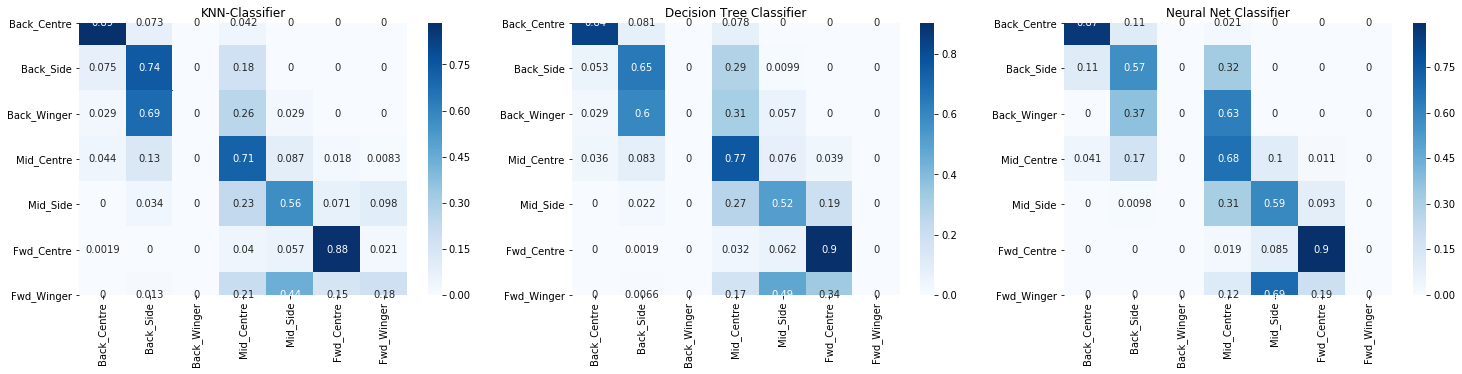

In [108]:
def display_confusion_matrix(y, y_hat, label, axs):
    res = confusion_matrix(y, y_hat, labels = label)
    row_sums = res.astype(np.float).sum(axis=1)
    res = res/row_sums[:, np.newaxis]
    res = pd.DataFrame(res, columns = label, index = label)
    sns.heatmap(res, cmap="Blues", annot=True, ax=axs)

cols = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']
for col in cols:
    df_player.loc[:, 'n_'+col] = df_player[col] / df_player['overall']

req_col_basic = ['n_'+col for col in cols]

X = df_player[req_col_basic]
y = df_player['best_pos']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

fig, ax = plt.subplots(ncols=3, figsize=(25,5))

#KNN Classifier
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train, y_train)

display_confusion_matrix(y_test, classifier.predict(X_test), s, ax[0])

#Decision Tree Classifier
model = tree.DecisionTreeClassifier(max_depth=5)
model.fit(X_train, y_train)

display_confusion_matrix(y_test, model.predict(X_test), s, ax[1])

#Neural Net Classifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(7,7,7), 
                    activation='relu',random_state=1)
clf.fit(X_train, y_train)

display_confusion_matrix(y_test, clf.predict(X_test), s, ax[2])

ax[0].set_title('KNN-Classifier')
ax[1].set_title('Decision Tree Classifier')
ax[2].set_title('Neural Net Classifier')

Text(0.5, 1, 'Neural Net Classifier')

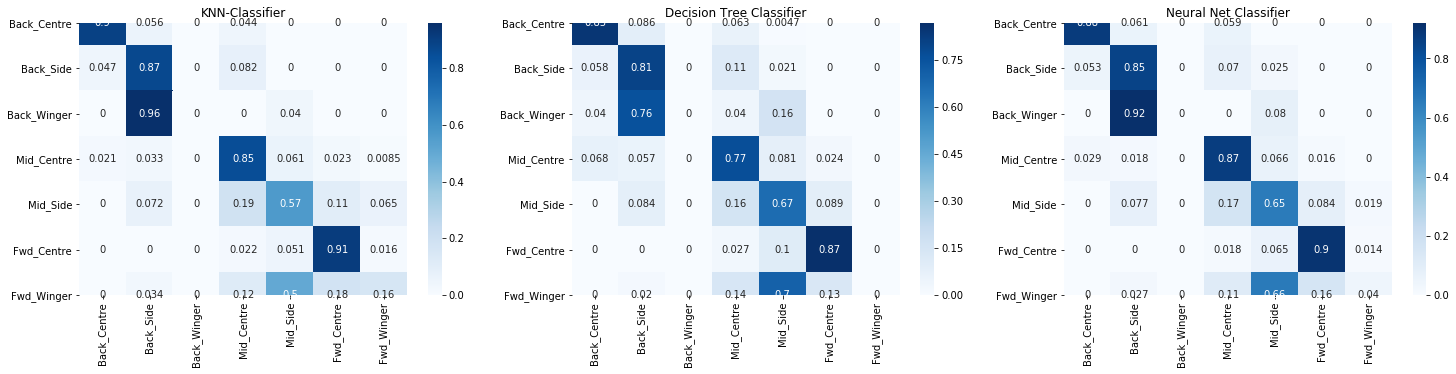

In [109]:
cols = ['attacking_crossing','attacking_finishing','attacking_heading_accuracy',
        'attacking_short_passing','attacking_volleys','skill_dribbling','skill_curve',
        'skill_fk_accuracy','skill_long_passing','skill_ball_control','movement_acceleration',
        'movement_sprint_speed','movement_agility','movement_reactions','movement_balance',
        'power_shot_power','power_jumping','power_stamina','power_strength','power_long_shots',
        'mentality_aggression','mentality_interceptions','mentality_positioning','mentality_vision',
        'mentality_penalties','mentality_composure','defending_marking','defending_standing_tackle',
        'defending_sliding_tackle']

for col in cols:
    df_player['n_'+col] = df_player[col] / df_player['overall']

req_col_detail = ['n_'+col for col in cols]

X = df_player[req_col_detail]
y = df_player['best_pos']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

fig, ax = plt.subplots(ncols=3, figsize=(25,5))

#KNN Classifier
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train, y_train)

display_confusion_matrix(y_test, classifier.predict(X_test), s, ax[0])

#Decision Tree Classifier
model = tree.DecisionTreeClassifier(max_depth=5)
model.fit(X_train, y_train)

display_confusion_matrix(y_test, model.predict(X_test), s, ax[1])

#Neural Net Classifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(7,7,7), 
                    activation='relu',random_state=1)
clf.fit(X_train, y_train)

display_confusion_matrix(y_test, clf.predict(X_test), s, ax[2])

ax[0].set_title('KNN-Classifier')
ax[1].set_title('Decision Tree Classifier')
ax[2].set_title('Neural Net Classifier')



A few observations:

    We are classifying all WingBacks as SideBacks. In fact, these 2 roles are quite similar while WingBacks are a bit more like an attacker. Examples would be A.Cole, Marcelo.
    Fwd Wingers are usually classified as side midfielders or centre forward. In fact, functions of LW & RW are exactly the combination of LM/RM and CF/ST. Classical examples will be L.Messi and Cristiano Ronaldo!
    Having more attributes is certainly improving the accuracy.



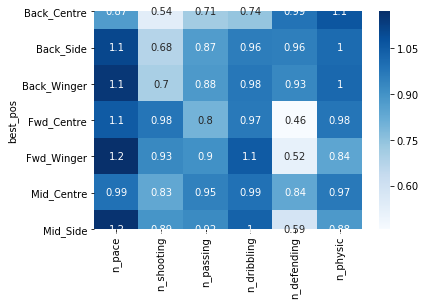

In [110]:
# What makes you good at each position?
df_analysis = df_player[req_col_basic + ['best_pos']]
tmp = df_analysis.groupby('best_pos').mean()
sns.heatmap(tmp, cmap="Blues", annot=True)



The heatmap tells the requirement of each position:

- Centre Defeners: Good Physic, such that you won't get crushed by the strikers
- Side (Wing) Defenders: Good defending skills and dribbling skills. You are the one to stop the counterparts and start your attack.
- Centre Midfielders: Good dribbling and passing skills is a must! You are connecting everyone in your team.
- Side Midfielders: Good passing skills and shooting skills would be useful. You are a great assistant to the strikers.
- Forward Wingers: Good shooting skills with fast pace are the definition of wingers. You are the attacker from the side.
- Centre Forward: Good dribbling and shooting skills is a must. Sometimes good physic can give you extra advantage to crush the defenders in the air!

